# Data Mining 7331 - Fall 2019
## Lab 2 - Classification

* **Allen Ansari**
* **Chad Madding**
* **Yongjun (Ian) Chu**

### nbviewer link:
https://nbviewer.jupyter.org/github/cmadding/MSDS7331/blob/master/Lab02/Lab2_Ansari_Madding_Chu.ipynb

## Introduction
Cardiovascular diseases (CVD) are the no. 1 cause of death in US each year. To reduce the death rate, the best approach is by early detection and screening. In this Lab we will implement models including decision tree, Random Forest, KNN and Support Vector Machine (SVM) to predict the probability of a patient having CVD based on results from medical examinations, such as blood pressure values and glucose content.
In addition, we will also try to set up models to predict cholesterol level (normal or not) for each patient based on their medical exam results.

## Data description

We will be performing an analysis of the cardiovascular diseases dataset found on Kaggle (https://www.kaggle.com/sulianova/cardiovascular-disease-dataset). It consists of 70,000 records of patient’s data in 12 features, such as age, gender, systolic blood pressure, diastolic blood pressure and CVD status(binary, 1 or 0).
There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

|Feature   |Variable Type   |Variable   |Value Type   |
|:---------|:--------------|:---------------|:------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

For any binary data type, "0" means "No" and "1" means "Yes". All of the dataset values were collected at the moment of medical examination.

## Table of Contents<a id="top"></a>

* **[Data Preparation Part 1](#Data_Preparation_Part_1)**
    *  Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.
* **[Data Preparation Part 2](#Data_Preparation_Part_2)**
    *  Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).
* **[Modeling and Evaluation 1](#Modeling_and_Evaluation_1)**
    *  Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.
* **[Modeling and Evaluation 2](#Modeling_and_Evaluation_2)**
    *  Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.
* **[Task 1](#Task_1)**
    * **[1.1 Modeling and Evaluation 3](#1.1_Modeling_and_Evaluation_3)**
         *  Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!
    * **[1.2 Modeling and Evaluation 4](#1.2_Modeling_and_Evaluation_4)**
         *  Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.
    * **[1.3 Modeling and Evaluation 5](#1.3_Modeling_and_Evaluation_5)**
         *  Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.
    * **[1.4 Modeling and Evaluation 6](#1.4_Modeling_and_Evaluation_6)**
         *  Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.
* **[Task 2](#Task_2)**    
    * **[2.1 Modeling and Evaluation 3](#2.1_Modeling_and_Evaluation_3)**
         *  Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!
    * **[2.2 Modeling and Evaluation 4](#2.2_Modeling_and_Evaluation_4)**
         *  Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.
    * **[2.3 Modeling and Evaluation 5](#2.3_Modeling_and_Evaluation_5)**
         *  Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.
    * **[2.4 Modeling and Evaluation 6](#2.4_Modeling_and_Evaluation_6)**
         *  Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.
* **[Deployment](#Deployment)**
    *  How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would you deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?
* **[Exceptional Work](#Exceptional_Work)**
    *  You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?

<a href="#top">Back to Top</a>
### Data_Preparation_Part_1 <a id="Data_Preparation_Part_1"></a>
* We obtained this CVD dataset from Kaggle. The purpose of this dataset was to determine which medical aspects had the most bearing on whether a patient would have CVD or not and have normal or not normal cholesterol level. 

In [3]:
#Import data all necessary libraries we will be using in our estimation

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import sklearn
import statistics
import random

from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, RFE, SelectFromModel

from sklearn.preprocessing import StandardScaler, Binarizer

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, auc, roc_curve
from IPython.display import display, HTML

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit, StratifiedShuffleSplit

from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

matplotlib.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

#Bring in data set
df = pd.read_csv('data/cardio_train.csv', sep= ';') #read in the csv file

# Show the dimension and the first 5 rows of the dataset
print(df.shape)
df.head()

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Our data preparation includes following steps:
* Remove the "id" attribute as it is not needed in this assignment
* Inspect each feature for NA values. If more than 75% of the feature contains NA, we replace that field with 0. If less than 75% is NA, then the median value of the column is used to replace the NA
* Check for any categorical variables and using proper methods (like one-hot) to convert them to numerical variables
* Remove all duplicate entries in the dataset
* Search each feature for any outliers and remove them from dataset. We will keep the entries between 97.5% quantile and 2.5% quantile for those features which have outliers or incorrect data 
* Add new variable call Body mass index (BMI) which is commonly used in medical field

In [4]:
# drop 'id' column 
if 'id' in df:
    del df['id']

In [5]:
# Total missing values for each feature
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

We want to see the data type of each column of the CVD dataset and see if there are any categorical variables in the dataset. 

In [6]:
# are there any NA values in the dataset
if df.isnull().values.any():
    print('There are NAs or missing values in the datasets.')
else:
    print('There are no missing values or NAs in the dataset.')        

There are no missing values or NAs in the dataset.


In [7]:
# Are there any non-numbers in each column?
for column in df:
    print(column)
    cnt=0
    for row in df[column]:
        try:
            float(row)
        except ValueError:
            print("there is a non-numeric value: " + row)
            pass
        cnt+=1
        
print(cnt)

age
gender
height
weight
ap_hi
ap_lo
cholesterol
gluc
smoke
alco
active
cardio
70000


All values in the dataset are numeric.

In [8]:
#Are there any duplicate entries in the dataset?
duplicateRowsDF = df[df.duplicated(keep='first')]

print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

print(f"\nThere are {len(duplicateRowsDF)} duplicated entries in the dataset!")


Duplicate Rows except first occurrence based on all columns are :
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
10562  20495       1     165    70.0    120     80            1     1      0   
21784  16793       1     165    68.0    120     80            1     1      0   
38505  18988       1     164    65.0    120     80            1     1      0   
40365  14552       1     158    64.0    120     80            1     1      0   
42450  18353       1     169    67.0    120     80            1     1      0   
44653  16937       2     170    70.0    120     80            1     1      0   
45125  21280       1     165    65.0    120     80            1     1      0   
45748  22077       1     175    69.0    120     80            1     1      0   
45810  21230       1     164    62.0    120     80            1     1      0   
48917  21945       1     165    60.0    120     80            1     1      0   
50432  17493       2     169    74.0    120     80    

For duplicated entries, we think they were just from mistakes by entering more than once. These 24 entries should be removed.

In [9]:
#remove duplicates in the dataframe
df.drop_duplicates(keep = 'first', inplace = True) 
df.shape

(69976, 12)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


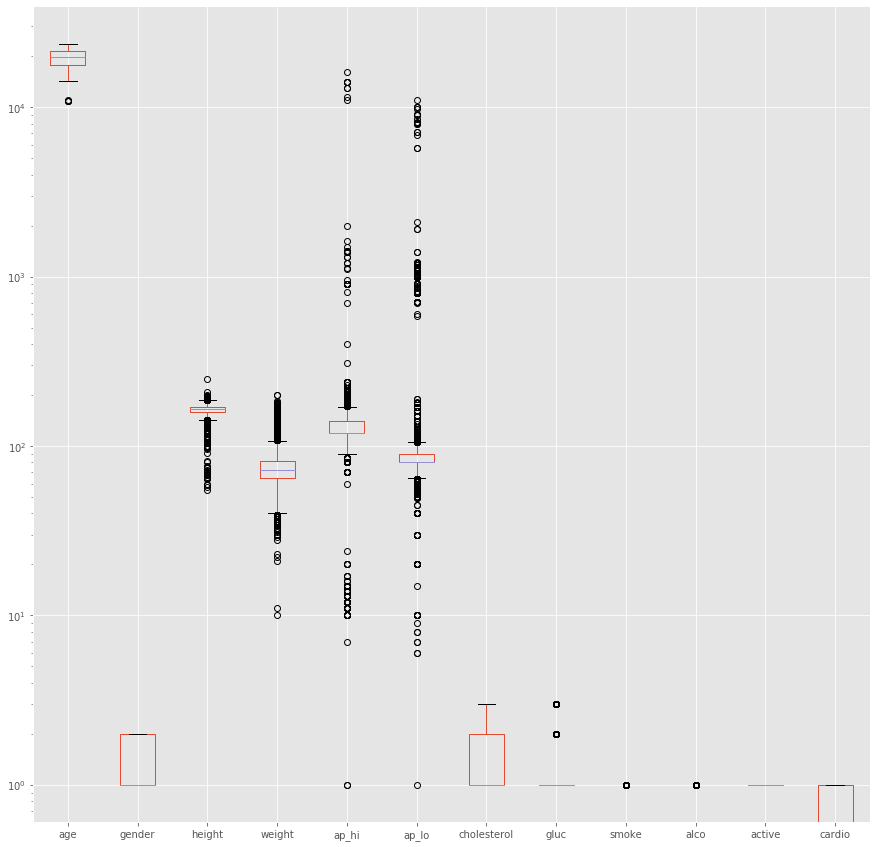

In [10]:
#are there any outliers in the dataset?

#boxplot of all the variables
plt.figure(figsize=(15, 15))
ax = df.boxplot()
ax.set_yscale('log')

df.describe()

From the simple statistical information and the boxplots above, we can easily see that there are some incorrect data points there. For example, the blood pressure has negative readings and the maximum readings for both Systolic blood pressure (ap_hi) and Diastolic blood pressure (ap_lo) are over 10,000, which are obviously mistakes. 

In [11]:
#to only keep the entries between 97.5% quantile and 2.5% quantile for ap_hi and ap_lo
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)
df.shape

(66169, 12)

We also notice that there are some abnormal values in column "weight" and "height". The minimum weight is 10 kg and maximum 200 kg. and the minimum height is 55 cm and maximum is 250 cm. Obviously these values are outliers as they don't represent the values for normal people. So, we decided to remove these by only keeping the values from 2.5 to 97.5 percentile range. 

In [12]:
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)

From above statistics table we realized that age measured in days, for better description we decided to convert age variable to be in years.

In [13]:
df['years'] = (df['age'] / 365).round().astype('int')
if 'age' in df:
    del df['age']

In [14]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,52
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,48


Body mass index (BMI) is commonly used in medical field. It is a key index for relating weight to height. BMI is a person's weight in kilograms (kg) divided by his or her height in meters squared.

In [15]:
#define BMI
df['BMI'] = df['weight']/((df['height']/100)**2)
# converting BMI range to categorical as 1 = underweight,2 = normal, 3 = overweight and 4 = obese
df['BMI'] = df['BMI'].apply(lambda x: 1 if x<18.5 else(2 if x>=18.5 and x<25 else( 3 if x >= 25 and x < 30 else 4)))

in CDV dataset gender shown as 1 for female and 2 for men. Since this is a binary feature showing these 2 categories as 1 and 2 does not make sense, so we are change the gender levels to be 0 for female and 1 for male.

In [16]:
#change gender levels: 1 to 0 (female) and 2 to 1 (male)
df['gender'] = df['gender'].apply(lambda x:0 if x == 1 else(1))

<a href="#top">Back to Top</a>
### Data Preparation Part 2<a id="Data_Preparation_Part_2"></a>
* Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

Our final dataset includes 13 features and 60728 entries. 

In [27]:
#https://pypi.org/project/pandas-profiling/
#Import Pandas Profiling for the report
import pandas_profiling

#To display the report in a Jupyter notebook, run:
df.profile_report(title='Pandas Profiling Report For The Cardio Data Set',style={'full_width':True})


In [20]:
#To retrieve the list of variables which are rejected due to high correlation:
profile = df.profile_report()
rejected_variables = profile.get_rejected_variables(threshold=0.9)

Generate an HTML report file, save the ProfileReport to an object and use the to_file() function:

In [26]:
profile = df.profile_report(title='Pandas Profiling Report For The Cardio Data Set',style={'full_width':False})
profile.to_file(output_file="data/cardio.html")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60728 entries, 0 to 69999
Data columns (total 13 columns):
gender         60728 non-null int64
height         60728 non-null int64
weight         60728 non-null float64
ap_hi          60728 non-null int64
ap_lo          60728 non-null int64
cholesterol    60728 non-null int64
gluc           60728 non-null int64
smoke          60728 non-null int64
alco           60728 non-null int64
active         60728 non-null int64
cardio         60728 non-null int64
years          60728 non-null int32
BMI            60728 non-null int64
dtypes: float64(1), int32(1), int64(11)
memory usage: 6.3 MB


|Feature   |Variable Type   |Variable   |Value Type   |
|:---------|:--------------|:---------------|:------------|
| Years | Objective Feature | years | int (years) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | binary |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Body Mass Index | Examination Feature | bmi | int |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


<a href="#top">Back to Top</a>
### Modeling and Evaluation 1<a id="Modeling_and_Evaluation_1"></a>

The purpose of this LAB was to determine which medical aspects had the most bearing on whether a patient would had CVD or not and also to classified cholesterol level each patient into normal and high cholesterol level.

A receiver operating characteristic curve, ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied which is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
A ROC curve can be used to select a threshold for a classifier which maximizes the true positives, while minimizing the false positives.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random. Most classifiers have AUCs that fall somewhere between these two values. Therefore, the overall model performances can be compared by considering the AUC.

In addition to ROC-AUC metric, we use the other classification metrics in our models too. 

1- Accuracy: Is the proportion of the total number of predictions that were correct over all kinds predictions made. Accuracy is a good measure when the target variable classes in the data are nearly balanced.

Accuracy = (TP + TN)/(TP + FP + FN + TN)

2- Precision: Which is also called Positive Predictive Value and is the proportion of positive cases that were correctly identified.

Precision = (TP) / (TP + FP)

3- Recall or Sensitivity: Is the proportion of actual positive cases which are correctly identified.

Recall = (TP) / (TP + FN)

Recall gives us information about a model performance with respect to false negatives (how many did we miss), while precision gives us information about its performance with respect to false positives (how many did we caught).

So basically, if we want to focus more on minimizing False Negatives, we would want our Recall to be as close to 100% as possible without precision being too bad and if we want to minimize False positives, then our focus should be to make Precision as close to 100% as possible.


<a href="#top">Back to Top</a>
### Modeling and Evaluation 2<a id="Modeling_and_Evaluation_2"></a>

Before carrying out the modeling, we have to decide which method we are going to choose for the cross validation. 

In [159]:
#cardio percentage split
(df['cardio'].value_counts()/len(df))*100

0    50.801937
1    49.198063
Name: cardio, dtype: float64

In [161]:
#cholesterol percentage split
(df['cholesterol'].value_counts()/len(df))*100

1    75.754183
2    13.091161
3    11.154657
Name: cholesterol, dtype: float64

For this project, CVD dataset will be split into training and test sets as 80/20. For data training, a standard 10-fold cross validation technique are used, in this technique dataset will split into 10 equal sections, train on nine of the sections and score against the last section. This method will cycle through 10 times so that the each of the 10 sections is used as a holdout sample. We chose to shuffle the data during the cross validation to provide a higher confidence there was no grouping of schools that we did not notice.

There is another option available called the Stratified k-fold technique which works to balance the ratio of labels used in each fold. Our dependent variable (cardio) has approximately a 49-51% split (see above), and with a large enough data set we can have a high level of confidence of a random split in the data without using Stratified techniques. In other hand for Cholesterol there is imbalanced distribution between classes (see above). The major class is patients with normal cholesterol level(75.7%) followed by above normal (13%) and well above normal (11%). Since the important thing is that to know if patient has normal cholesterol level or not we decided to combine both above normal classes (2 and 3) and use Modified synthetic minority oversampling technique (MSMOTE) which takes a subset of data from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

We chose a K fold (10 folds) validation algorithm, however a Shuffle Split may have performed just as well with this size data set. Where Shuffle Split is capable of creating n folds and fitting the data using n-1 to train and 1 to test against, there is a chance the same data will appear in the test set each time the data is sampled. We chose K fold to insure each value is used in the training set.

With the 10-fold cross validation we will be using a grid search technique, which will test a number of different parameters to determine the best final model. Different classification algorithms will have different parameters that can be set, so these will be tested with the grid search method.

Since CVD dataset does not have so many features (only 12) dimensionality reduction techniques are not used.

Our basic pipeline includes observation scaling and model classification steps. Observation scaling is a common step for all models. For this step the 'standardscaler' is used, which will scale our variables. This improves our prediction outcomes and makes later feature interpretation significantly easier, since all coefficients will be on the same scale.

The same random seed of 101 is used for all models that take a random state seed to eliminate the variability of getting different results between running our models so that we are able to hold which model is going to be the best model, for later interpretation.

<a href="#top">Back to Top</a>
## Task 1<a id="Task_1"></a>

### 1.1 Modeling and Evaluation 3<a id="1.1_Modeling_and_Evaluation_3"></a>

For cardio prediction we tried 4 different algorithms to create a model which has superior prediction capabilities based on the ROC/AUC scoring parameter:

* Decision Tree
* K-Nearest Neighbor
* Random Forest Classification

The accurcy, Precision and Recall will be calculated for each model.

In [162]:
#separating data into two parts X (features) and Y (target) as matrix
features = ["gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "years", "BMI"]
# Separating out the features
X = df.loc[:, features].values

#Separating out the target
y = df.loc[:, ['cardio']].values.ravel()
y.shape

(60728,)

In [163]:
#divide data into two parts X1(features) and y1(target) as data frames
df_1 = df.copy()
X1 = df_1[features].copy()

y1= df_1[['cardio']].copy()
y1.shape

(60728, 1)

In [20]:
#the pipeline template where we will test for scaling, and classification.
#k_fold = KFold(n_splits=10,shuffle=True)
#pipe = Pipeline([ ('scale', StandardScaler()), 
#                  ('clf', GradientBoostingClassifier())])

To perform a cross validation using the best parameters for the model which it is passed we use below code that borrowed form  Dr. Jake Drew's 2017HighlySegregatedHighSchoolCampuses Jupyter Notebook provided to the class.

In [164]:
#Classifier Evaluation
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, Y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X, Y, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Rreavg = scores['test_recall'].mean()
    
    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average Recall for all cv folds is: \t\t\t {Rreavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Rreavg=Rreavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']
    print(scoresResults)
    return scoresResults


In [165]:
# Scaling training variables
scl = StandardScaler()
X_Scl = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

#### Model #1 Decision Tree Classifier

In [166]:
#Decision Tree Classification 10-fold cross-validation
ClsEstimator = DecisionTreeClassifier()


param_grid = [
    {
         'max_depth': [5,10,15,20,30],
         'random_state':[101] 
     }
]

DTGridSearch = GridSearchCV(estimator=ClsEstimator, param_grid=param_grid, cv=cv, n_jobs=8, verbose=1, scoring='roc_auc' )

#Perform hyperparameter search to find the best combination of parameters for our data
DTGridSearch.fit(X_Scl, y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    8.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=8,
             param_grid=[{'max_depth': [5, 10, 15, 20, 30],
     

In [167]:
#Display the best estimator parameters
DTGridSearch.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [168]:
%%time
#Use the best parameters for our DT object
classifierEst = DTGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
DT_scores = EvaluateClassifierEstimator(classifierEst, X_Scl, y, cv)

The average accuracy for all cv folds is: 			 0.72444
The average precision for all cv folds is: 			 0.76704
The average Recall for all cv folds is: 			 0.63333
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0  0.724564   0.750858  0.658635
1  0.725342   0.750000  0.662651
2  0.727812   0.782480  0.618809
3  0.732093   0.791935  0.617805
4  0.716944   0.773374  0.600736
5  0.722872   0.744108  0.665663
6  0.722872   0.777070  0.612450
7  0.726449   0.780220  0.618011
8  0.726120   0.779325  0.618346
9  0.719368   0.741075  0.660194
Wall time: 1.63 s


#### Model #2 KNN Classification Parameter Optimization with GridSearch

K-Nearest Neighbor (KNN) classification is valid option for this dataset since the dataset has been preprocessed and it has no missing values.  Parameter selections are critical to the performance of KNN classifiers; therefore, substantial time and effort was put forth to fully investigate the optimal parameters. 

##### Parameter Analysis:

*Algorithms:*  Algorithm used to compute the nearest neighbors can be ‘auto’matically determine the most appropriate algorithm to use for the given dataset/parameters, so it was left as default in our GridSearch

##### GridSearch Parameters:

*n_neighbors:* Number of neighbors to use in the analysis. Preliminary analyses were conducted to find a desired range of for number of neighbors. From these analyses, it was determined that the optimal number of neighbors is below 15. Above 15, the accuracy plateaus and start to decrease.

*Leaf_size:* The leaf size was adjusted, using: 10, 30, and 100 as the parameters. While there is an over-head penalty with using smaller leaves, accuracy may increase, so we will use it in our Grid Search.

*Metric:* How distance is measured between datapoints can be adjusted. The 2 options chosen were ‘minkowski’ and ‘euclidean’.

*Weights:* Both uniform and distance were looked at. ‘Uniform’ weight-all neighboring points get equal weight. ‘Distance’ weights points by the inverse of their distance.

*Predictor Variables:*  
Many of the predictor variable have different scaling, so to ensure all variables were treated equally in the analysis, all predictor variables are scaled to have a mean of 0 and Standard deviation of 1.

In [169]:
#KNN Classification 10-fold cross-validation
ClsEstimator = KNeighborsClassifier()


param_grid = [
    {
         'weights': ['uniform','distance'],
         'leaf_size': [10,30],
         'metric': ['minkowski','euclidean'],
         'n_neighbors':[3,5,13,15],
         
    }
]

KNNGridSearch = GridSearchCV(estimator=ClsEstimator, param_grid=param_grid, cv=cv, n_jobs=8, verbose=1, scoring='roc_auc' )

#Perform hyperparameter search to find the best combination of parameters for our data
KNNGridSearch.fit(X_Scl, y)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   46.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=8)]: Done 320 out of 320 | elapsed:  8.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=8,
             param_grid=[{'leaf_size': [10, 30],
                          'metric': ['minkowski', 'euclidean'],
                          'n_neighbors': [3, 5, 13, 15],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [170]:
#Display the best estimator parameters
KNNGridSearch.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

The GridSearch algorithm determined the following optimal parameters for K-Neighbors model.

* Leaf-Size: 10  
* Number of Neighbors: 15

* Distance Matric: Minkowski  
* Weights: Uniform

In [171]:
%%time
#Use the best parameters for our KNN object
classifierEst = KNNGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
KNN_scores = EvaluateClassifierEstimator(classifierEst, X_Scl, y, cv)

The average accuracy for all cv folds is: 			 0.71427
The average precision for all cv folds is: 			 0.72597
The average Recall for all cv folds is: 			 0.67349
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0  0.708100   0.718604  0.668340
1  0.714968   0.721693  0.684739
2  0.717273   0.729174  0.676707
3  0.716450   0.735491  0.661647
4  0.706405   0.720293  0.659304
5  0.722378   0.734679  0.682062
6  0.712827   0.723741  0.673360
7  0.719862   0.731461  0.680281
8  0.710639   0.718085  0.677938
9  0.713768   0.726514  0.670572
Wall time: 13min 56s


#### Model #3 Random Forest

One of the most commonly used classifier techniques is random forest, due to its very low bias and general stability when it comes to classification. One method of optimizing a random forest model is to try different parameters to increase performance. Another method of doing so is by utilizing grid search to let random forest decide which combination of hyperparameters would be best implemented in your model. We chose this route as it saves both time and sanity when comparing so many different parameters.

In [37]:
#Random Forest Classification 10-fold cross-validation
from sklearn.ensemble import RandomForestClassifier

ClsEstimator = RandomForestClassifier()

param_grid = [
    {
         'n_estimators': [100, 200, 500], 
         'max_depth': [5,10,15,20,30],
         'random_state':[101]
     }
]

RFGridSearch = GridSearchCV(estimator=ClsEstimator, param_grid=param_grid, cv=cv, n_jobs=8, verbose=1, scoring='roc_auc' )

#Perform hyperparameter search to find the best combination of parameters for our data
RFGridSearch.fit(X_Scl, y)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed: 13.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
       

In [38]:
#Display the best estimator parameters
RFGridSearch.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [39]:
%%time
#Use the best parameters for our random forest object
classifierEst = RFGridSearch.best_estimator_

#Evaluate the classification estimator above using our pre-defined cross validation and scoring metrics. 
Random_Forest_scores = EvaluateClassifierEstimator(classifierEst, X_Scl, y, cv)

The average accuracy for all cv folds is: 			 0.72897
The average precision for all cv folds is: 			 0.75704
The average Recall for all cv folds is: 			 0.66141
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0  0.725716   0.753257  0.657965
1  0.731270   0.757795  0.667001
2  0.733246   0.763685  0.662985
3  0.735057   0.769021  0.659639
4  0.723201   0.749713  0.656627
5  0.728470   0.754466  0.664324
6  0.727976   0.756332  0.659639
7  0.733202   0.761377  0.666555
8  0.728755   0.754947  0.664212
9  0.722826   0.749808  0.655172
Wall time: 4min 29s


<a href="#top">Back to Top</a>
### 1.2 Modeling and Evaluation 4<a id="1.2_Modeling_and_Evaluation_4"></a>

To visualize the performance of different models, we plotted the ROC curves for each model.  

In [50]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10)

In [61]:
#define 3 functions to plot the ROC curve
def calculate_probability(classifier, A, B, D):
    probas_ = classifier.fit(A, B).predict_proba(D)
    return probas_

#def calculate_probability_based_on_confidence(classifier, A, B, D):
#    probas_ = classifier.fit(A, B).decision_function(D)
#    return probas_
    
def plotROCcurve(classifier, X, y, cv, calculate_probability, model):
    # Run classifier with cross-validation and plot ROC curves
    tprs = []
    aucs = []

    mean_fpr = np.linspace(0, 1, 100)
    
    i = 0
    for train, test in cv.split(X, y):
        probas_ = calculate_probability(classifier, X[train], y[train], X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i += 1
        
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
        
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic--{model}')
    plt.legend(loc="lower right")
    plt.show()
    return mean_fpr, mean_tpr, mean_auc, std_auc

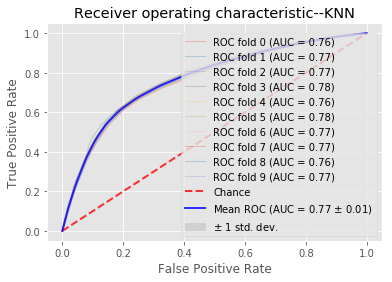

In [57]:
%matplotlib inline
#plot KNN ROC curves and AUC
classifier = KNNGridSearch.best_estimator_
#plotROCcurve(classifier, X_Scl, y, cv, model='KNN')
mean_fpr_knn, mean_tpr_knn, mean_auc_knn, std_auc_knn = plotROCcurve(classifier, X_Scl, y, cv, calculate_probability, model='KNN')

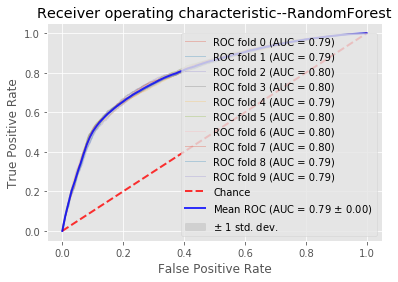

In [58]:
%matplotlib inline
#plot random forest ROC curves and AUC
classifier = RFGridSearch.best_estimator_

mean_fpr_rf, mean_tpr_rf, mean_auc_rf, std_auc_rf = plotROCcurve(classifier, X_Scl, y, cv, calculate_probability, model='RandomForest')

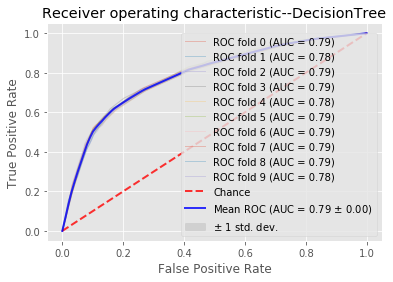

In [68]:
%matplotlib inline
#plot Decision Tree ROC curves and AUC
classifier = DTGridSearch.best_estimator_

mean_fpr_dt, mean_tpr_dt, mean_auc_dt, std_auc_dt = plotROCcurve(classifier, X_Scl, y, cv, calculate_probability, model='DecisionTree')

Here is the summary of the performance of 4 tested models:

|Model   |AUC   |Accuracy(%)   |
|:---------|:--------------|:---------------|
| KNN | 0.77 | 71.4 |
| Random Forest | 0.79 | 72.9 |
| Decision Tree | 0.79 | 72.4 |

The best model we found was Random Forest Classification, with a ROC/AUC score of ~.79 and an accuracy of 72.9%, both highest among 3 models tested. On the other hand, the computation time taken by each model was comparable between each other. This leads to the conclusion that the Random Forest Classification could be used to accurately predict the cardio disease outcome. To make this clearer, we also plotted all 3 ROC curves within one graph (see below). The shape of each ROC curve is quite similar to each other, represented by curves that bow up to the top left of the plot, suggesting all models have good skills at predicting the outcome. With Random Forest having the largest area under the curve, it means that Random Forest model is the most skillful model among 3 tested for the kind of dataset we have.  

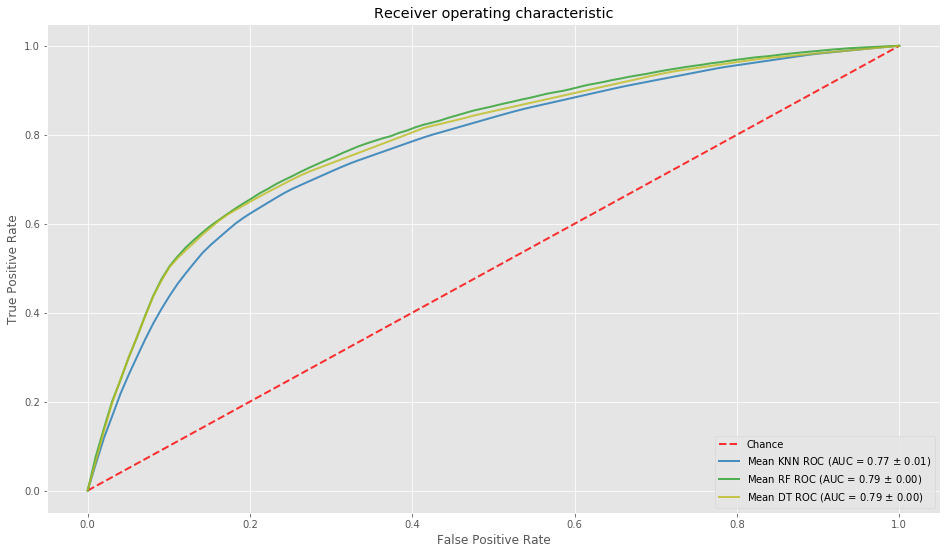

In [70]:
#plot all average ROC curves in one graph
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,9))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

plt.plot(mean_fpr_knn, mean_tpr_knn, color='tab:blue',
         label=r'Mean KNN ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_knn, std_auc_knn),
         lw=2, alpha=.8)

plt.plot(mean_fpr_rf, mean_tpr_rf, color='tab:green',
         label=r'Mean RF ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_rf, std_auc_rf),
         lw=2, alpha=.8)

plt.plot(mean_fpr_dt, mean_tpr_dt, color='tab:olive',
         label=r'Mean DT ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_dt, std_auc_dt),
         lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<a href="#top">Back to Top</a>
### 1.3 Modeling and Evaluation 5<a id="1.3_Modeling_and_Evaluation_5"></a>

Models we implemented: 

1. **K-Nearest Neighbor**<br>
        Advantage:
            -Model does not need to be trained and incremental learning is done when new data is
            fed in. 
        Disadvantage:
            -Does not handle large number of dimensions.
            -Weighing of attributes needs to be done. Additional work.
            -memory intensive. 
            
2. **Random Forest** <br>
        Advantage: 
            -Robust to overfitting. 
            -Performs well with large number of features.
        Disadvantage: 
            -Learning is slow and integration to improve generated models is not possible. 
            
3. **Decision Tree** 
       Advantages:
            -Compared to other algorithms decision trees requires less effort for data 
            preparation during pre-processing.
            -A decision tree does not require normalization of data.
            -A decision tree does not require scaling of data as well.
            -Missing values in the data also does NOT affect the process of building decision 
            tree to any considerable extent.
            -A Decision trees model is very intuitive and easy to explain to technical teams 
            as well as stakeholders.
      Disadvantage:
            -A small change in the data can cause a large change in the structure of the 
            decision tree causing instability.
            -For a Decision tree sometimes calculation can go far more complex compared to 
            other algorithms.
            -Decision tree often involves higher time to train the model.
            -Decision tree training is relatively expensive as complexity and time taken is more.
            -Decision Tree algorithm is inadequate for applying regression and predicting 
            continuous values.
            
            
As we have discussed in the above section, the best model we found was Random Forest Classification, with highest AUC and accuracy among 3 models tested. 

### Statistical Comparison of Classifiers: 

In [108]:
%%time
from sklearn.model_selection import cross_val_score

acc_KNN = cross_val_score(KNNGridSearch.best_estimator_, X_Scl, y, cv=cv)
acc_RF = cross_val_score(RFGridSearch.best_estimator_, X_Scl, y, cv=cv)
acc_DT = cross_val_score(DTGridSearch.best_estimator_, X_Scl, y, cv=cv)

Wall time: 3min 5s


In [109]:
t = 2.26 / np.sqrt(10)

e_KNN_RF = (1-acc_KNN)-(1-acc_RF)
e_KNN_DT = (1-acc_KNN)-(1-acc_DT)
e_RF_DT = (1-acc_RF)-(1-acc_DT)

stdtot_K_R = np.std(e_KNN_RF)
stdtot_K_D = np.std(e_KNN_DT)
stdtot_R_D = np.std(e_RF_DT)



dbarKR = np.mean(e_KNN_RF)
dbarKD = np.mean(e_KNN_DT)
dbarRD = np.mean(e_RF_DT)

print ('Range of KNN_RF confidence interval:[%0.6f,%0.6f]' % (dbarKR-t*stdtot_K_R,dbarKR+t*stdtot_K_R))
print ('Range of KNN_DT confidence interval:[%0.6f,%0.6f]' % (dbarKD-t*stdtot_K_D,dbarKD+t*stdtot_K_D))
print ('Range of RF_DT confidence interval:[%0.6f,%0.6f]' % (dbarRD-t*stdtot_R_D,dbarRD+t*stdtot_R_D))

Range of KNN_RF confidence interval:[0.010345,0.018439]
Range of KNN_DT confidence interval:[0.005139,0.013666]
Range of RF_DT confidence interval:[-0.006343,-0.003636]


According to above confidence interval range for each two models comparison we found none of them contain 0 so, we are 95% confident that these 3 models are not the same.

<a href="#top">Back to Top</a>
### 1.4 Modeling and Evaluation 6<a id="1.4_Modeling_and_Evaluation_6"></a>

We have found out Random Forest classifier has the best performance on cardio in CVD dataset. Now, we proceed to find the Level of importance of each feature in this model.

Whit this process we are trying to select those features that contribute most to the outcome we are trying to predict.    

The benefits of feature selection include reduce overfitting, improving accuracy and minimizing computing time. 

* All features are scaled in the model.
* The coefficient values indicate the level of feature influence on model performance, higher value means stronger influence and importance.
* The influence values are sorted and top features with strongest influences are plotted.

In [71]:
#Create a classification estimator with best parameters for cross validation
classifierEst = RFGridSearch.best_estimator_

#Fit the model using all of the scaled training data
classifierEst.fit(X_Scl,y)

from sklearn.metrics import confusion_matrix

In [72]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
weights = classifierEst.feature_importances_.ravel()
print(weights)
feature_names = X1.columns.values
print(feature_names)
linreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
linreg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

[0.00537068 0.02813086 0.04419266 0.44071874 0.20197101 0.09106903
 0.01418782 0.00576254 0.00456829 0.00961302 0.13479627 0.01961907]
['gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol' 'gluc' 'smoke'
 'alco' 'active' 'years' 'BMI']


Text(0.5,0,'Coefficient Magnitude\n(z-score)')

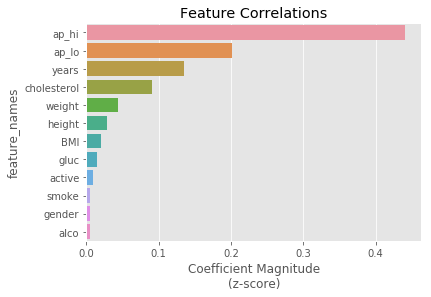

In [73]:
# Examine variables of interest  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

ax = sns.barplot(x =linreg_ft_imp_df['weights'], y = linreg_ft_imp_df['feature_names'], orient= 'h')
ax.set_title("Feature Correlations")
ax.set_xlabel("Coefficient Magnitude\n(z-score)")

Based on the coefficient shown above, it appears that ap_hi is the most important feature, followed by ap_lo, years, cholesterol, weight, height and others. 

It is obvious that Systolic blood pressure (ap_hi) holds the most weight in our prediction, followed by Diastolic blood pressure (ap_lo). These make a lot of sense as people with high blood pressure will have a bigger burden on their hearts, which would lead to cardio diseases later on. The age of a patient was the third in the prediction of cardo. This would also make sense as the older a person is the more risky of developing cardiovascular problems. We found that the data showed a person in their mid-50’s and older was more at risk. Numerous scientific reports have suggested a positive correlation between cholecsterol level, overweight and cardio diseases. Obviously, our above data supported that. On the other hand, gender, active status and glucose situation appeared to not play significant role in terms of correlating with cardio status. This is understandable. For example, glucose situation should be more related to diabetes, not cardio-disease. Since cardio disease is not caused by genetics in general, the feature of gender should not play a significant role here.  

#### Finding the most influential features by Recursive Feature Elimination method

In [74]:
%%time
from sklearn.feature_selection import RFECV

#Create a regression estimator with best parameters for cross validation
classifierEst = RFGridSearch.best_estimator_

rfecv = RFECV(estimator=classifierEst, step=1, cv=cv, scoring='accuracy')
rfecv.fit(X_Scl, y)

Wall time: 23min 3s


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=10,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=500, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

Optimal number of features : 12


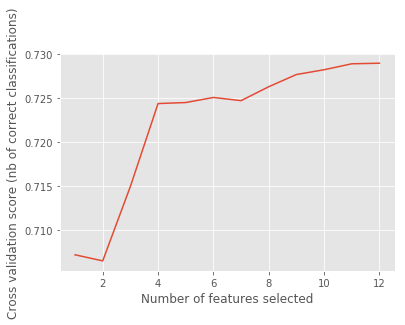

In [75]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [76]:
#find which features were eliminated
eliminated_fea =[]
for i in range(len(rfecv.ranking_)):
    if rfecv.support_[i] == False :
        eliminated_fea.append(features[i])
    
    #i+1
    
print(f"Eliminated features: {eliminated_fea}")

Eliminated features: []


In [77]:
#Plot the RFE Rankings
plt.style.use('ggplot')

rfe_ft_imp_df = pd.DataFrame({'feature_names':X1.columns, 'weights':rfecv.grid_scores_})
rfe_ft_imp_df.sort_values(by='weights', inplace=True, ascending=False )

features_RF = rfe_ft_imp_df

features_RF

,feature_names,weights
11,BMI,0.728972
10,years,0.728906
9,active,0.728231
8,alco,0.727687
7,smoke,0.726304
5,cholesterol,0.725086
6,gluc,0.724723
4,ap_lo,0.724509
3,ap_hi,0.724394
2,weight,0.714991


Results from the Recursive Feature Elimination method suggest that all the features should be included in the Random Forest modeling for a dataset like ours.

<a href="#top">Back to Top</a>
# Task 2<a id="Task_1"></a>

### 2.1 Modeling and Evaluation 3<a id="2.1_Modeling_and_Evaluation_3"></a>

Now we are using 3 different classifiers to predict if patient cholesterol is in normal level or above. As we mentioned previously there is imbalanced distribution in cholesterol classes and we can not use regular cross validation methods. We decided to combine 2 above normal classes together (as not normal cholesterol level, '1') and use SMOTE technique to generate new samples for minor class in order to solve imbalanced situation. This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. In addition to SMOTE, there is another technique to deal with imbalanced distribution which called NearMiss. NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to minority class. For this task we used accuracy as a metric to evaluate 3 different models which are KNN , Random Forest and Logistic Regression.

In [78]:
# combining 2 above normal classes
df['cholesterol'] = df['cholesterol'].apply(lambda x:1 if x == 2 or x == 3 else(0))
#cholesterol percentage split
(df['cholesterol'].value_counts()/len(df))*100

0    75.754183
1    24.245817
Name: cholesterol, dtype: float64

In [79]:
#separating input data into two parts X (features) and Y (target)
features1 = ["gender", "height", "weight", "ap_hi", "ap_lo","cardio", "gluc", "smoke", "alco", "active", "years", "BMI"]

X2 = df[features1].copy()

Y2= df[['cholesterol']].copy()
Y2

,cholesterol
0,0
1,1
2,1
3,0
4,0
5,1
6,1
7,1
8,0
9,0


In [110]:
# Scaling training variables
scl = StandardScaler()
X2_Scl = scl.fit_transform(X2)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

In [111]:
# train and test split before resampling
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_Scl, Y2, test_size = 0.2, random_state = 101) 

print("Before OverSampling, counts of label '1': {}".format(sum(y2_train['cholesterol'] == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y2_train['cholesterol'] == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X2_train_res, y2_train_res = sm.fit_sample(X2_train, y2_train) 
  
print('After OverSampling, the shape of train_X: {}'.format(X2_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y2_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y2_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y2_train_res == 0))) 


Before OverSampling, counts of label '1': 11761
Before OverSampling, counts of label '0': 36821 

After OverSampling, the shape of train_X: (73642, 12)
After OverSampling, the shape of train_y: (73642,) 

After OverSampling, counts of label '1': 36821
After OverSampling, counts of label '0': 36821


#### Model 1: KNN Classification

In [112]:
#KNN Classification 10-fold cross-validation
cv = StratifiedKFold(n_splits=10)
ClsEstimator = KNeighborsClassifier()


param_grid = [
    {
         'weights': ['uniform','distance'],
         'leaf_size': [10,30],
         'metric': ['minkowski','euclidean'],
         'n_neighbors':[3,5,13,15],
         
    }
]

KNNGridSearch_2 = GridSearchCV(estimator=ClsEstimator, param_grid=param_grid, cv=cv, n_jobs=8, verbose=1, scoring='accuracy' )

#Perform hyperparameter search to find the best combination of parameters for our data
KNNGridSearch_2.fit(X2_train_res, y2_train_res)

y_KNN_score2 = KNNGridSearch_2.predict(X2_test)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   53.8s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  4.7min
[Parallel(n_jobs=8)]: Done 320 out of 320 | elapsed:  8.5min finished


In [113]:
KNNGridSearch_2.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [114]:
%%time
#Use the best parameters for our KNN object
classifierEst = KNNGridSearch_2.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
KNearest_scores2 = EvaluateClassifierEstimator(classifierEst, X2_train_res, y2_train_res, cv)

The average accuracy for all cv folds is: 			 0.81493
The average precision for all cv folds is: 			 0.76244
The average Recall for all cv folds is: 			 0.91456
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0  0.795276   0.758130  0.867228
1  0.779196   0.740524  0.859587
2  0.793319   0.749884  0.880228
3  0.811244   0.757181  0.916350
4  0.823058   0.763455  0.936176
5  0.826181   0.766061  0.939163
6  0.825502   0.768061  0.932645
7  0.829576   0.771902  0.935633
8  0.831070   0.771855  0.939978
9  0.834872   0.777328  0.938620
Wall time: 7min 6s


In [115]:
confusion_matrix(y2_test, y_KNN_score2)

array([[6673, 2510],
       [1312, 1651]], dtype=int64)

In [116]:
%%time
#find the accuracy for the whole dataset
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=101)
KNN_accuracy = cross_val_score(KNNGridSearch_2.best_estimator_, X2_Scl, y=Y2, cv=cv)
KNN_acc=KNN_accuracy.mean()
KNN_acc

Wall time: 21.1 s


0.7470194728346009

In [117]:
KNN_accuracy

array([0.74613105, 0.74613105, 0.74366151, 0.75288113, 0.7414361 ,
       0.75378788, 0.74769433, 0.74374177, 0.743083  , 0.7516469 ])

#### Model #2 Random Forest Classification

In [118]:
#Random Forest Classification 10-fold cross-validation
cv = StratifiedKFold(n_splits=10)
ClsEstimator = RandomForestClassifier()

param_grid = [
    {
         'n_estimators': [50, 100, 200, 500], 
         'max_depth': [5,10,15,20,30],
         'random_state':[101]
     }
]

RFGridSearch_2 = GridSearchCV(estimator=ClsEstimator, param_grid=param_grid, cv=cv, n_jobs=8, verbose=1, scoring='accuracy' )

#Perform hyperparameter search to find the best combination of parameters for our data
RFGridSearch_2.fit(X2_train_res, y2_train_res)

y_RF_score2 = RFGridSearch_2.predict(X2_test)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 17.9min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed: 21.6min finished


In [119]:
RFGridSearch_2.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [120]:
%%time
#Use the best parameters for our Random Forest object
classifierEst = RFGridSearch_2.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
RF_scores2 = EvaluateClassifierEstimator(classifierEst, X2_train_res, y2_train_res, cv)

The average accuracy for all cv folds is: 			 0.85066
The average precision for all cv folds is: 			 0.84897
The average Recall for all cv folds is: 			 0.84789
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0  0.733641   0.834435  0.582949
1  0.723112   0.802356  0.592070
2  0.733569   0.815712  0.603476
3  0.870858   0.853299  0.895709
4  0.905350   0.858860  0.970125
5  0.902634   0.859743  0.962249
6  0.910375   0.867998  0.967952
7  0.912140   0.869311  0.970125
8  0.907795   0.865240  0.966051
9  0.907116   0.862778  0.968224
Wall time: 12min 33s


In [121]:
confusion_matrix(y2_test, y_RF_score2)

array([[7874, 1309],
       [1598, 1365]], dtype=int64)

In [122]:
%%time
#find the accuracy for the whole dataset
cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=101)
RF_accuracy = cross_val_score(RFGridSearch_2.best_estimator_, X2_Scl, y=Y2, cv=cv)
RF_acc=RF_accuracy.mean()
RF_acc

Wall time: 4min 39s


0.7805790344642688

In [123]:
RF_accuracy

array([0.77576556, 0.77839974, 0.7764241 , 0.78992427, 0.77667984,
       0.78277339, 0.78162055, 0.77783267, 0.77980896, 0.78656126])

#### Model #3 Logistic Regression

In [124]:
#Logistic Regression Classification 10-fold cross-validation
from sklearn.linear_model import LogisticRegression
ClsEstimator = LogisticRegression()
cv = StratifiedKFold(n_splits=10)

parameters = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'class_weight': ['balanced','none']
              ,'random_state': [101]
              ,'solver': ['lbfgs']
              ,'max_iter':[1500,2000]
             }


LRGridSearch_2 = GridSearchCV(estimator=ClsEstimator, param_grid=parameters, cv=cv, n_jobs=8, verbose=1, scoring='accuracy' )

#Perform hyperparameter search to find the best combination of parameters for our data
LRGridSearch_2.fit(X2_train_res, y2_train_res)

y_LR_score2 = LRGridSearch_2.predict(X2_test)


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   14.2s
[Parallel(n_jobs=8)]: Done 280 out of 280 | elapsed:   19.5s finished


In [125]:
LRGridSearch_2.best_estimator_

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=101, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
%%time
#Use the best parameters for our Logistic Regression object
classifierEst = LRGridSearch_2.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
LR_scores2 = EvaluateClassifierEstimator(classifierEst, X2_train_res, y2_train_res, cv)

The average accuracy for all cv folds is: 			 0.69477
The average precision for all cv folds is: 			 0.71657
The average Recall for all cv folds is: 			 0.64463
*********************************************************
Cross Validation Fold Mean Error Scores
   Accuracy  Precision    Recall
0  0.697665   0.719940  0.647027
1  0.683324   0.700416  0.640684
2  0.700163   0.719084  0.656980
3  0.695003   0.716005  0.646388
4  0.691200   0.706937  0.653178
5  0.692151   0.713553  0.642042
6  0.699212   0.726319  0.639326
7  0.700163   0.725797  0.643400
8  0.688485   0.711585  0.633895
9  0.700299   0.726019  0.643400
Wall time: 1.92 s


In [127]:
confusion_matrix(y2_test, y_LR_score2)

array([[6894, 2289],
       [1030, 1933]], dtype=int64)

In [128]:
%%time
#find the accuracy for the whole dataset
cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=101)
LR_accuracy = cross_val_score(LRGridSearch_2.best_estimator_, X2_Scl, y=Y2, cv=cv)
LR_acc=LR_accuracy.mean()
LR_acc

Wall time: 1.04 s


0.7266990386029484

In [129]:
LR_accuracy

array([0.73411261, 0.72884425, 0.72077708, 0.73345407, 0.72249671,
       0.72809618, 0.72842556, 0.72101449, 0.72826087, 0.72150856])

<a href="#top">Back to Top</a>
### 2.2 Modeling and Evaluation 4<a id="2.2_Modeling_and_Evaluation_4"></a>

The best model we found was Random Forest Classification, with a accuracy score of ~.78, followed by KNN and Logistic Regression. 

In [130]:
print ('accuracy for KNN classifier is :',KNN_acc)
print ('accuracy for Random Forest classifier is :',RF_acc)
print ('accuracy for Logistic Regression classifier is :',LR_acc)

accuracy for KNN classifier is : 0.7470194728346009
accuracy for Random Forest classifier is : 0.7805790344642688
accuracy for Logistic Regression classifier is : 0.7266990386029484


<a href="#top">Back to Top</a>
### 2.3 Modeling and Evaluation 5<a id="2.3_Modeling_and_Evaluation_5"></a>

The advantges and disadvantages of KNN and Random Forest have been discussed in the task 1. Here we only brielfy talk about about logistic regression (LR). The big advantage of LR is its speed. It only took 19.5 seconds for 280 rounds of grid search, while random forest took 21.6 minutes for 200 rounds and KNN 8.5 minutes for 320 rounds. Another advantage of LR is that the coefficients gnerated by this model is interpretable, which is quite essential in some caces. The disanvatage is its perforance is not as good as others, such as the random forest model. 

## Statistical Comparison of Classifiers: 

In [131]:
t = 2.26 / np.sqrt(10)

e_KNN_LR = (1-KNN_accuracy)-(1-LR_accuracy)
e_KNN_RF = (1-KNN_accuracy)-(1-RF_accuracy)
e_RF_LR = (1-RF_accuracy)-(1-LR_accuracy)


stdtot_K_L = np.std(e_KNN_LR)
stdtot_K_R = np.std(e_KNN_RF)
stdtot_R_L = np.std(e_RF_LR)



dbarKL = np.mean(e_KNN_LR)
dbarKR = np.mean(e_KNN_RF)
dbarRL = np.mean(e_RF_LR)



print ('Range of KNN_LR confidence interval:[%0.6f,%0.6f]' % (dbarKL-t*stdtot_K_L,dbarKL+t*stdtot_K_L))
print ('Range of KNN_RF confidence interval:[%0.6f,%0.6f]' % (dbarKR-t*stdtot_K_R,dbarKR+t*stdtot_K_R))
print ('Range of RF_LR confidence interval:[%0.6f,%0.6f]' % (dbarRL-t*stdtot_R_L,dbarRL+t*stdtot_R_L))


Range of KNN_LR confidence interval:[-0.023892,-0.016749]
Range of KNN_RF confidence interval:[0.031725,0.035394]
Range of RF_LR confidence interval:[-0.057911,-0.049849]


None of above confidence intervals contain 0 so we are 95% confident that the performances of all three models are not the same.

<a href="#top">Back to Top</a>
### 2.4 Modeling and Evaluation 6<a id="2.4_Modeling_and_Evaluation_6"></a>

We found out Random Forest classifier has the best performance on cholesterol in CVD dataset. Now, we proceed to find the level of importance of each feature in this model.

In [132]:
#Create a classification estimator with best parameters for cross validation
classifierEst = RFGridSearch_2.best_estimator_

#Fit the model using all of the scaled training data
classifierEst.fit(X2_Scl,Y2)

from sklearn.metrics import confusion_matrix

In [133]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
weights = classifierEst.feature_importances_.ravel()
print(weights)
feature_names = X2.columns.values
print(feature_names)
linreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
linreg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

[0.01808296 0.19177175 0.21548902 0.09343373 0.05997359 0.02533953
 0.14677755 0.01262587 0.01069897 0.02283488 0.18111254 0.0218596 ]
['gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cardio' 'gluc' 'smoke' 'alco'
 'active' 'years' 'BMI']


Text(0.5,0,'Coefficient Magnitude\n(z-score)')

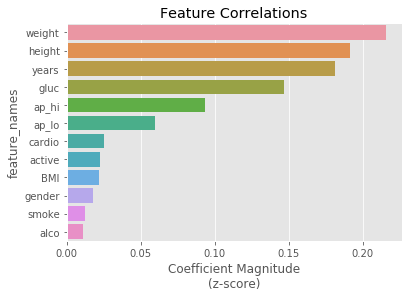

In [134]:
# Examine variables of interest  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

ax = sns.barplot(x =linreg_ft_imp_df['weights'], y = linreg_ft_imp_df['feature_names'], orient= 'h')
ax.set_title("Feature Correlations")
ax.set_xlabel("Coefficient Magnitude\n(z-score)")

Based on the coefficient shown above, it appears that weight is the most important feature, followed by height, years, gluc, ap_hi, ap_lo and others. 

The overweight is often associated with higher cholesterol level for a patient. That's why we see the weight is the most important predictor here for cholecterol level. We don't know exactly why height is the second factor that is closely correlated with cholecterol level. Age is correlated with cholesterol level makes sense, as people get older, their cholesterol levels slowly but gradually increase. 

#### Finding the most influential features by Recursive Feature Elimination method

In [136]:
%%time
from sklearn.feature_selection import RFECV

#Create a regression estimator with best parameters for cross validation
classifierEst = RFGridSearch_2.best_estimator_

rfecv = RFECV(estimator=classifierEst, step=1, cv=None, scoring='accuracy')
rfecv.fit(X2_Scl, Y2)
#the process would take multiple hours to finish if we use 10-fold CV. So we set cv=None. 

Wall time: 12min 46s


RFECV(cv=None,
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=30,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=500, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

Optimal number of features : 12


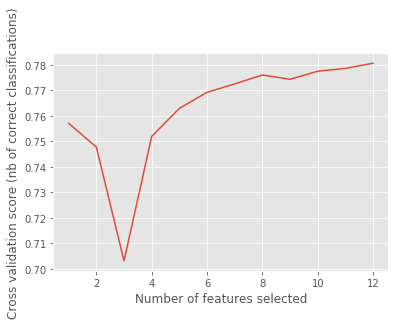

In [137]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [138]:
#find which features were eliminated
eliminated_fea =[]
for i in range(len(rfecv.ranking_)):
    if rfecv.support_[i] == False :
        eliminated_fea.append(features[i])
    
    #i+1
    
print(f"Eliminated features: {eliminated_fea}")

Eliminated features: []


In [139]:
#Plot the RFE Rankings
plt.style.use('ggplot')

rfe_ft_imp_df = pd.DataFrame({'feature_names':X2.columns, 'weights':rfecv.grid_scores_})
rfe_ft_imp_df.sort_values(by='weights', inplace=True, ascending=False )

features_RF = rfe_ft_imp_df

features_RF

,feature_names,weights
11,BMI,0.780579
10,years,0.778554
9,active,0.777434
7,smoke,0.775968
8,alco,0.774289
6,gluc,0.772461
5,cardio,0.769167
4,ap_lo,0.762894
0,gender,0.757015
3,ap_hi,0.751844


Results from the Recursive Feature Elimination method suggest that all the features should be included in the Random Forest modeling of cholesterol levels for a dataset like ours.

<a href="#top">Back to Top</a>
### Deployment<a id="Deployment"></a>

##### How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)?

* For our first task, targeting cardio-disease status, we expect multiple possibilities for application, mainly the hospitals and insurance companies. The hospitals can use this model, Random Forest model, to predict which customers may develop cardio-disease based on the medical records with them and may send reminders to those customers in risk. The insurance companies can use this model to rationally assign resources (e.g. family nurses) to those who really needs the care. By doing this, the insurance companies can reduce huge amount of cost of admitting patients to ER and staying in the hospital. 

* For our second task, targeting abnormal cholesterol level, our random forest model may be used by companies. Medical research has suggested that people who have high cholesterol level, the chance of getting heart disease is much higher. The companies that are specialized in developing and producing drugs to lower cholesterol level in human can use this model to target those who live in rural area and don’t have physical examination done regularly. Obviously, these companies have to collaborate with hospital or other agents, so that they can access the people’s medical record. Companies specialized in weight loss may also use this model. 

##### How would you measure the model's value if it was used by these parties?

* Obviously, the value for the first model would be to save people lives and reduce medical cost. Cardio disease happens fast and people could die very quickly. Alerting those people in risk earlier and have them take preventive medicine is extremely helpful. Reducing the admissions of patients to ER due to cardio-disease will save a lot of money for medical insurance companies. 

* The value for the second model would be to make profit for pharmaceutical companies that are specialized in producing medicines reducing the cholesterol levels. Since weight is strongly correlated with cholesterol level based on our model, those companies which are specialized in reducing people’s weight can also make profit from this model.

##### How would you deploy your model for interested parties?

* For the models to be used by interested parties, the model needs to be made available in the software the team's analysts use. One potential way would be by creating a restful API in python, then using a lambda function hosted in AWS to trigger an EC2 instance.

##### What other data should be collected?

* The accuracy of the current models are both less than 80%. To further improve the accuracy, we think that family member medical history should be collected, such as a patient’s parents medical information. After all, the cardio disease status  and cholesterol level are more or less correlated with genetics.

##### How often would the model need to be updated?

* This model would need to be updated on yearly basis. This is because medical treatment is improving consistently and whole health care condition is getting better. People who may develop cardio disease in the past may not develop this disease now.


<a href="#top">Back to Top</a>
### Exceptional Work<a id="Exceptional_Work"></a>
* You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?

We will be looking at a Voting Classifier. Voting is one of the easyest ways of combining the predictions from multiple machine learning algorithms. Voting classifier isn’t an actual classifier but it wraps up different ones that are trained and valuated in parallel in order to look at the different uniqueness of each system. We will use and ensemble of different algorithms then predict the final output.

This output on a prediction is taken by majority vote according to two different strategies:

* Hard voting / Majority voting: Hard voting is the simplest case of majority voting. In this case, the class that received the highest number of votes will be chosen.
Or
* Soft Voting / Average probability: The probability vector for each predicted class are summed and the average is collected. The winning class is the one with the highest value.

We will use both hard and soft voting .

### Hard Voting

In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

# Training classifiers

clf1 = SGDClassifier(alpha=0.01, average=False,
                           class_weight='balanced', early_stopping=False,
                           epsilon=0.1, eta0=0.0, fit_intercept=True,
                           l1_ratio=0.15, learning_rate='optimal',
                           loss='hinge', max_iter=1000, n_iter_no_change=5,
                           n_jobs=None, penalty='l2')

clf2 = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski', 
                                           metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                                           weights='uniform')

clf3 = RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=10,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500,random_state=101,
                                        )

clf4 = DecisionTreeClassifier(class_weight=None,criterion='gini',max_depth=5,splitter='best')

eclf = VotingClassifier(estimators=[('SVM', clf1), ('KNN', clf2),
                                    ('RF', clf3),('DT',clf4)],voting='hard',)

labels = ['SVM', 'KNN (k=13)', 'Random Forest (depth=10)','Decision Tree (depth=5)','Ensemble']

for clf, label in zip([clf1, clf2, clf3,clf4,eclf], labels):

    scores = model_selection.cross_val_score(clf, X, Y, 
                                              cv=StratifiedKFold(n_splits=10, random_state=101), 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.70 (+/- 0.02) [SVM]
Accuracy: 0.70 (+/- 0.01) [KNN (k=13)]
Accuracy: 0.73 (+/- 0.00) [Random Forest (depth=10)]
Accuracy: 0.72 (+/- 0.00) [Decision Tree (depth=5)]
Accuracy: 0.73 (+/- 0.01) [Ensemble]


### Soft Voting

In [41]:
clf1_1 = SGDClassifier(alpha=0.01, average=False,
                           class_weight='balanced', early_stopping=False,
                           epsilon=0.1, eta0=0.0, fit_intercept=True,
                           l1_ratio=0.15, learning_rate='optimal',
                           loss='modified_huber', max_iter=1000, n_iter_no_change=5,
                           n_jobs=None, penalty='l2')

eclf_soft = VotingClassifier(estimators=[('SVM', clf1_1), ('KNN', clf2),
                                    ('RF', clf3),('DT',clf4)],voting='soft',)

labels = ['SVM', 'KNN (k=13)', 'Random Forest (depth=10)','Decision Tree (depth=5)','Ensemble']

for clf, label in zip([clf1, clf2, clf3,clf4,eclf], labels):

    scores = model_selection.cross_val_score(clf, X, Y, 
                                              cv=StratifiedKFold(n_splits=10, random_state=101), 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.67 (+/- 0.04) [SVM]
Accuracy: 0.70 (+/- 0.01) [KNN (k=13)]
Accuracy: 0.73 (+/- 0.00) [Random Forest (depth=10)]
Accuracy: 0.72 (+/- 0.00) [Decision Tree (depth=5)]
Accuracy: 0.72 (+/- 0.01) [Ensemble]


After reviewing both Hard and Soft voting we found that neither type produced better results than we already had.